In [1]:
import sys
import os

# Add src directory to system path to allow imports
sys.path.append(os.path.abspath("../src"))


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from preprocess import load_data, preprocess_data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib


In [3]:
# Load data from file
df = load_data("../data/auto-mpg.data-original")

# Preprocess data
df_clean = preprocess_data(df)

# Drop rows with missing target values
missing_mpg = df_clean['mpg'].isnull().sum()
print(f"Missing values in target (mpg): {missing_mpg}")
df_clean = df_clean.dropna(subset=['mpg'])

df_clean.head()


Missing values in target (mpg): 8


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_2.0,origin_3.0
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,chevrolet chevelle malibu,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,buick skylark 320,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,plymouth satellite,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,amc rebel sst,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,ford torino,0,0


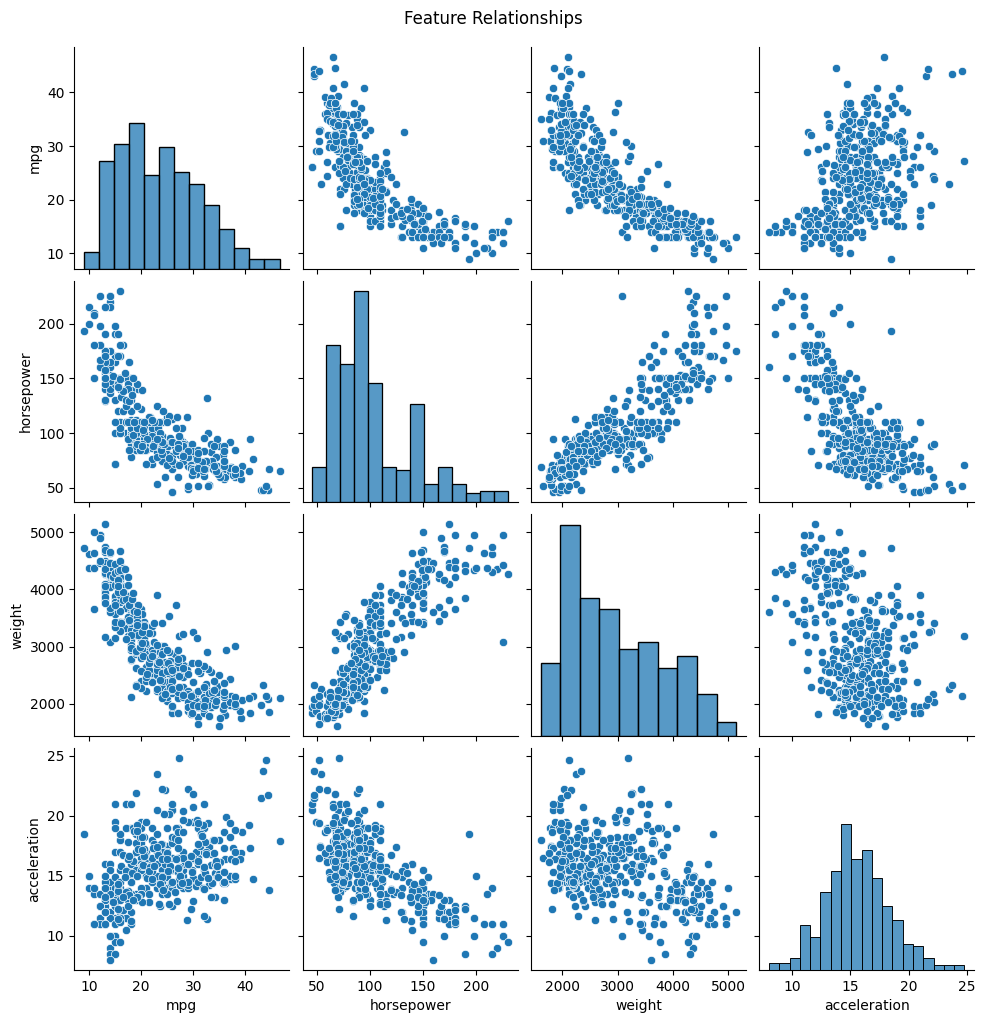

In [4]:
# Visualize relationships between features
sns.pairplot(df_clean[['mpg', 'horsepower', 'weight', 'acceleration']])
plt.suptitle("Feature Relationships", y=1.02)
plt.show()


In [5]:
# Separate features and target variable
X = df_clean.drop(columns=['mpg', 'car name'])
y = df_clean['mpg']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Model Mean Squared Error (MSE): {mse:.2f}")


Model Mean Squared Error (MSE): 8.34


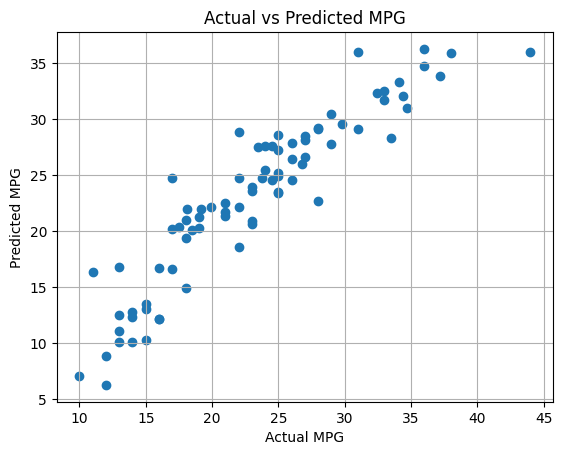

In [7]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.grid(True)
plt.show()


In [8]:
# Save the trained model to disk
joblib.dump(model, "../mpg_model.pkl")
print("Model saved as mpg_model.pkl")


Model saved as mpg_model.pkl


In [9]:
# Load the saved model
loaded_model = joblib.load("../mpg_model.pkl")

# Use it to make predictions again
y_loaded_pred = loaded_model.predict(X_test)
print("Prediction with loaded model (first 5):", y_loaded_pred[:5])


Prediction with loaded model (first 5): [32.48302063 29.19994645 21.24300715 16.82692875 12.34370257]
